In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy import stats

In [2]:
passive_benign1 = pd.read_csv('data/passive-benign-background/2.4ghz_passivescan_background_loc1_2.csv')
passive_benign2 = pd.read_csv('data/passive-benign-background/2.4ghz_passivescan_background_loc1_18.csv')
passive_benign_3 = pd.read_csv('data/passive-benign-background/2.4ghz_passivescan_background_loc1_27.csv')

passive_jamming1 = pd.read_csv('data/passive-gaussian-jamming/2412mhz_jamming_12dbm_gaussiannoise_1.csv')
passive_jamming2 = pd.read_csv('data/passive-gaussian-jamming/2412mhz_jamming_9dbm_gaussiannoise_6.csv')
passive_jamming3 = pd.read_csv('data/passive-gaussian-jamming/2412mhz_jamming_6dbm_gaussiannoise_13.csv')

In [3]:
passive_benign1.head(1)

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,2412,-107,103,74,392,9,12,51


Text(0.5, 1.0, 'Passive scan benign background at 2.4 GHz')

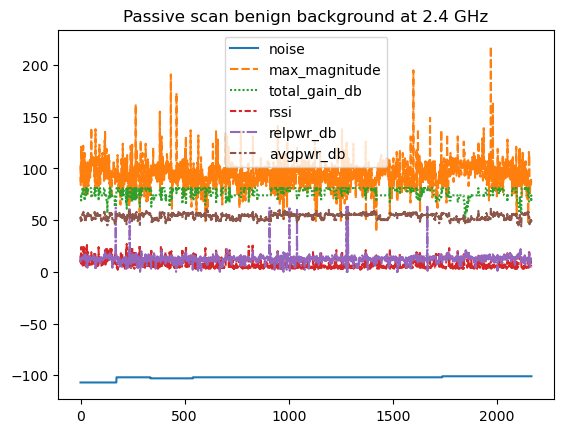

In [4]:
passive_benign_data = passive_benign1.drop(['freq1', 'base_pwr_db'], axis=1)
sns.lineplot(passive_benign_data)
plt.title('Passive scan benign background at 2.4 GHz')

Text(0.5, 1.0, 'Passive gaussian jamming at 2.4 GHz')

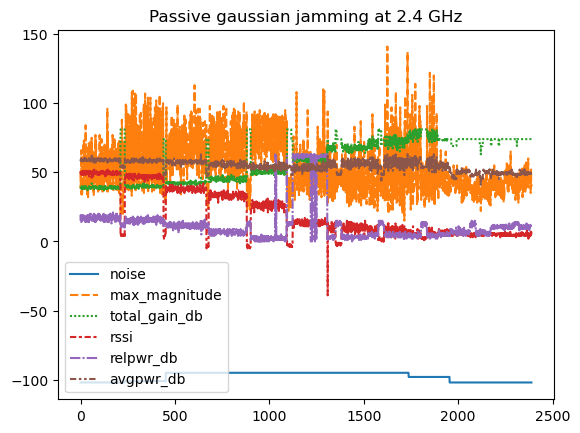

In [5]:
passive_gaussian_jamming = passive_jamming1.drop(['freq1', 'base_pwr_db'],axis=1)
sns.lineplot(passive_gaussian_jamming)
plt.title('Passive gaussian jamming at 2.4 GHz')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Passive gaussian jamming at 2.4 GHz')

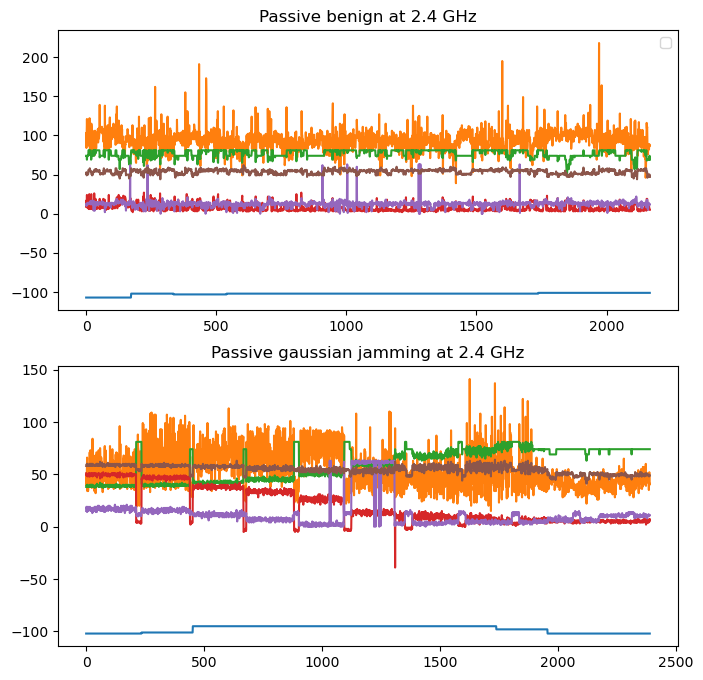

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
ax1.plot(passive_benign_data)
ax1.set_title('Passive benign at 2.4 GHz')
ax1.legend()
ax2.plot(passive_gaussian_jamming)
ax2.set_title('Passive gaussian jamming at 2.4 GHz')


In [7]:
passive_benign = pd.concat([passive_benign1, passive_benign2, passive_benign_3], ignore_index=True)
passive_jamming = pd.concat([passive_jamming1, passive_jamming2, passive_jamming3], ignore_index=True)

In [8]:
passive_benign['label'] = 0
passive_jamming['label'] = 1

In [9]:
combined_passive = pd.concat([passive_benign, passive_jamming])
combined_passive

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db,label
0,2412,-107,103,74,392,9,12,51,0
1,2412,-107,84,74,392,17,10,53,0
2,2412,-107,101,74,392,9,13,49,0
3,2412,-107,121,69,396,24,13,50,0
4,2412,-107,101,74,391,8,13,51,0
...,...,...,...,...,...,...,...,...,...
7145,2462,-102,48,74,386,4,12,49,1
7146,2462,-102,42,74,386,3,14,48,1
7147,2462,-102,48,74,386,5,13,48,1
7148,2462,-102,43,74,386,5,14,48,1


In [10]:
passive_X = combined_passive.drop(['label'], axis=1)
passive_y = combined_passive['label']

In [11]:
X_train_passive, X_test_passive, y_train_passive, y_test_passive = train_test_split(passive_X, passive_y, test_size=0.3, random_state=42)

passive_model = LogisticRegression(max_iter=2000, random_state=42)
passive_model.fit(X_train_passive, y_train_passive)

LogisticRegression(max_iter=2000, random_state=42)

In [12]:
passive_y_pred = passive_model.predict(X_test_passive)

In [13]:
print(confusion_matrix(y_test_passive, passive_y_pred))

[[1738  211]
 [ 177 1954]]


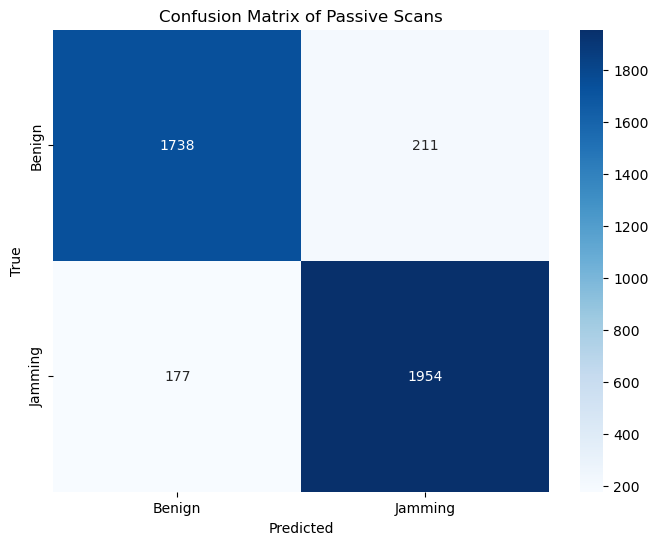

In [14]:
cm = confusion_matrix(y_test_passive, passive_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Jamming'], yticklabels=['Benign', 'Jamming'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Passive Scans')
plt.show()

Noticing some differences! Just applied the same model to passive data scans and it looks like this model isnt performing as great as the last one. Still accurate though!

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
passive_accuracy = accuracy_score(y_test_passive, passive_y_pred)
passive_precision = precision_score(y_test_passive, passive_y_pred)
passive_recall = recall_score(y_test_passive, passive_y_pred)
passive_f1 = f1_score(y_test_passive, passive_y_pred)

print(f"Passive Accuracy: {passive_accuracy: }")
print(f"Passive Precision: {passive_precision: }")
print(f"Passive Recall: {passive_recall: }")
print(f"Passive F1 Score: {passive_f1: }")

Passive Accuracy:  0.9049019607843137
Passive Precision:  0.902540415704388
Passive Recall:  0.9169404035664007
Passive F1 Score:  0.909683426443203


In [18]:
benign_rssi_test = passive_benign1['rssi']
jamming_rssi_test = passive_jamming1['rssi']

t_stat, p_value = stats.ttest_ind(benign_rssi_test, jamming_rssi_test)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -34.774656572493505
P-Value: 3.3725782631760075e-235


Wow! Thats a substantial difference. Looks like the RSSI value definitely does support the hypothesis that Received Signal Strengith Indicator's (RSSI) is a good indicator of jamming. Lets try to test it on the larger dataset

In [19]:
passive_benign_test = passive_benign['rssi']
passive_jamming_test = passive_jamming['rssi']

t_stat, p_value = stats.ttest_ind(passive_benign_test, passive_jamming_test)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -57.16301338058486
P-Value: 0.0


Basically the same results, supporting our hypothesis. Nice!